https://www.kaggle.com/code/kubraboduroglu/star-quasar-galaxy-classification/notebook

**SDSS** — это крупномасштабный набор изображений, включающий 306 006 галактик различных форм и типов, взятый из Sloan Digital Sky Survey.

**ОПИСАНИЕ**

Набор данных из 306 006 галактик, координаты которых взяты из Sloan Digital Sky Survey (SDSS; York et al. 2000), Data Release 7 (Abazajian et al. 2009) и модифицированного каталога Wilman et al. (2010). Этот полный объем выборки имеет предел абсолютной величины 𝑟-полосы 𝑀𝑟 ≤ −20 и предел красного смещения 𝑧 ≤ 0,08. См. Арора и др. (2019) подробнее. Этот каталог охватывает широкий спектр сред: от кластеров до групп и полевых систем. Как и в наборе данных PROBES, изображения галактик взяты из DESI (Дей и др., 2019). Мы используем этот набор данных и соответствующую обученную модель для сравнения статистики галактик на уровне населения (раздел 4.1). Для краткости мы называем это набором данных «SDSS».

**Описание**

В астрономии звездная классификация — это классификация звезд на основе их спектральных характеристик. Схема классификации галактик, квазаров и звезд — одна из самых фундаментальных в астрономии. Ранняя каталогизация звезд и их распределение на небе привела к пониманию того, что они составляют нашу собственную галактику, и, учитывая различие, что Андромеда была отдельной галактикой, отличной от нашей, по мере строительства более мощных телескопов начали исследовать многочисленные галактики.

**Целью** этой работы является классификация звезд, галактик и квазаров на основе их спектральных характеристик.

**Содержание**

Данные состоят из 100 000 наблюдений за космосом, сделанных SDSS (Sloan Digital Sky Survey). Каждое наблюдение описывается 17 столбцами признаков и 1 столбцом класса, который идентифицирует его как звезду, галактику или квазар.

**Значения полей**

1. obj_ID = идентификатор объекта, уникальное значение, идентифицирующее объект в каталоге изображений, используемом CAS

2. alpha = угол прямого восхождения (в эпоху J2000)

3. delta = угол склонения (в эпоху J2000)

4. u = ультрафиолетовый фильтр в фотометрической системе

5. g = зеленый фильтр в фотометрической системе

6. r = красный фильтр в фотометрической системе

7. i = фильтр ближнего инфракрасного диапазона в фотометрической системе

8. z = инфракрасный фильтр в фотометрической системе

9. run_ID = номер запуска, используемый для идентификации конкретного сканирования

10. rereun_ID = Номер повтора, чтобы указать, как было обработано изображение

11. cam_col = столбец камеры для идентификации строки сканирования в рамках прогона

12. field_ID = номер поля для идентификации каждого поля

13. spec_obj_ID = уникальный идентификатор, используемый для оптических спектроскопических объектов (это означает, что 2 разных наблюдения с одним и тем же spec_obj_ID должны иметь общий выходной класс)

14. class = класс объекта (объект галактики, звезды или квазара)

15. redshift = значение красного смещения, основанное на увеличении длины волны

16. plate = идентификатор номерного знака, идентифицирует каждый номерной знак в SDSS

17. MJD = модифицированная юлианская дата, используемая для указания того, когда был взят данный фрагмент данных SDSS

18. fibre_ID = идентификатор волокна, который идентифицирует волокно, направляющее свет в фокальную плоскость в каждом наблюдении





In [2]:
import numpy as np #работа с массивами
import pandas as pd #работа с данными
from matplotlib.colors import to_rgba #указания цвета
import seaborn as sns #создания статистических графиков
import matplotlib.pyplot as plt #построение графиков
from sklearn.preprocessing import LabelEncoder #кодирование категориальных переменных как целых чисел
import warnings #управление предупреждениями
from sklearn.model_selection import train_test_split, GridSearchCV #настройка гиперпараметров SVM GridSearchCV использует словарь,
#описывающий параметры, которые можно использовать в модели для ее обучения. Сетка параметров определяется как словарь, где ключами являются параметры, а значениями — настройки, подлежащие тестированию.
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn  import svm
from sklearn import metrics #метрики для оценки моделей машинного обучения
from sklearn.ensemble import RandomForestClassifier,VotingClassifier;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier #построение классификатора деревьев решений
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler #увеличение выборки
from imblearn.combine import SMOTEENN #ещё одна библиотека, выполняет аналогичные действия, но результаты могут отличаться с RandomOverSampler
from imblearn.pipeline import Pipeline #создание конвейеров, если в наборе данных есть дисбаланс классов и требуется использовать выборку с несбалансированным обучением, например, SMOTE.
from sklearn.preprocessing import StandardScaler, MinMaxScaler #стандартизированное распределение с нулевым средним значением и стандартным отклонением, равным единице (единичной дисперсией)
#MinMax Scaler — это другой способ масштабирования данных, при котором минимум характеристики равен нулю, а максимум — единице.
from imblearn.pipeline import make_pipeline # Pipeline, при котором идентификация estimators не требуется и не допускается.
#Вместо этого их имена автоматически преобразуются в нижний регистр в соответствии с их типом.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer,precision_recall_curve
from sklearn.metrics import mean_squared_error, classification_report,classification_report


from sklearn.neighbors import LocalOutlierFactor #позволяет определить, является ли образец из набора данных аномалией или нет
from imblearn.over_sampling import ADASYN #равномерное распределение
from collections import Counter #разновидность словаря Python, созданная для подсчёта
from sklearn.decomposition import PCA #разложения многомерного набора данных на набор последовательных ортогональных компонентов, объясняющих максимальную величину дисперсии
#объект-преобразователь, который изучает n компонентов в своём методе fit и может использоваться для проецирования новых данных на эти компоненты

#Yellowbrick — это расширение scikit-learn, которое позволяет использовать полезные и красивые визуализации для моделей машинного обучения
from yellowbrick.classifier import ConfusionMatrix #визуализатор для создания матрицы ошибок для модели
from yellowbrick.classifier import ClassPredictionError #позволяет визуализировать, с какими классами классификатор сталкивается с особыми трудностями, а также какие неправильные ответы он даёт на основе каждого класса
#Этот инструмент помогает лучше понять преимущества и недостатки разных моделей и специфические проблемы, связанные с определёнными наборами данных
from yellowbrick.classifier import ROCAUC #построения кривой “точность-полнота”
from yellowbrick.style import set_palette #устанавливает цветовую палитру в качестве текущей
from sklearn.ensemble import VotingClassifier # модель машинного обучения, которая тренируется на ансамбле многочисленных моделей и предсказывает выходной класс на основе их наибольшей вероятности выбора этого класса
#объединяет результаты каждого классификатора, передаваемого в него, и предсказывает выходной класс на основе наибольшего большинства голосов
from sklearn import model_selection #процесс выбора статистической модели из набора кандидатов на основе данных.
#этот процесс включает в себя ряд мероприятий, которые помогают определить, какая статистическая модель лучше всего подходит для выполнения предсказаний по определённой задаче

**ОБЩИЕ ХАРАКТЕРИСТИКИ ДАТАСЕТА И ПРЕДОБРАБОТКА**

In [3]:
df= pd.read_csv("star_classification.csv", sep=',')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.shape

(100000, 18)

In [5]:
df.info() # покажет информацию о размерности данных
          # описание индекса, количество not-a-number элементов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<Axes: >

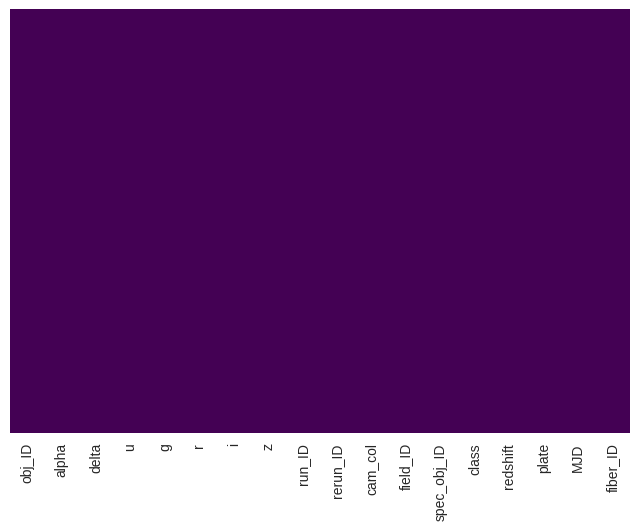

In [6]:
#визуализация отсутствия значений
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.isnull().sum()  #обработка пропусков

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
df.describe() # показывает статистики count,mean, std(стандартное отклонение), min, 25%-50%-75% percentile, max
              # только для числовых значений

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [9]:
df.nunique() # количество уникальных значений для каждого столбца

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

In [10]:
#количество каждого уникального значения для каждого столбца в наборе данных
feature_names = df.columns.tolist()
for column in feature_names:
    print(column)
    print("----------------------------------")
    print(df[column].value_counts(dropna=False))
    print("==================================")

obj_ID
----------------------------------
obj_ID
1.237659e+18    17
1.237663e+18    13
1.237666e+18    12
1.237664e+18    11
1.237663e+18    11
                ..
1.237658e+18     1
1.237668e+18     1
1.237654e+18     1
1.237662e+18     1
1.237661e+18     1
Name: count, Length: 78053, dtype: int64
alpha
----------------------------------
alpha
34.749600     2
135.689107    1
122.736311    1
28.449613     1
216.355348    1
             ..
247.814114    1
177.365643    1
169.790588    1
203.915984    1
196.896053    1
Name: count, Length: 99999, dtype: int64
delta
----------------------------------
delta
-0.601931     2
 32.494632    1
 37.973185    1
 6.153946     1
 45.335889    1
             ..
 54.546378    1
 2.275880     1
 34.816656    1
 34.287705    1
 49.464643    1
Name: count, Length: 99999, dtype: int64
u
----------------------------------
u
24.63465    77
24.63466    64
24.63467    44
24.63464    23
24.63468    20
            ..
20.52900     1
20.71782     1
24.04446     1

ОТОБРАЖЕНИЕ РАСПРЕДЕЛЕНИЯ КЛАССОВ

<ipython-input-11-4e8f9ebd90ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["class"], palette="Set3")


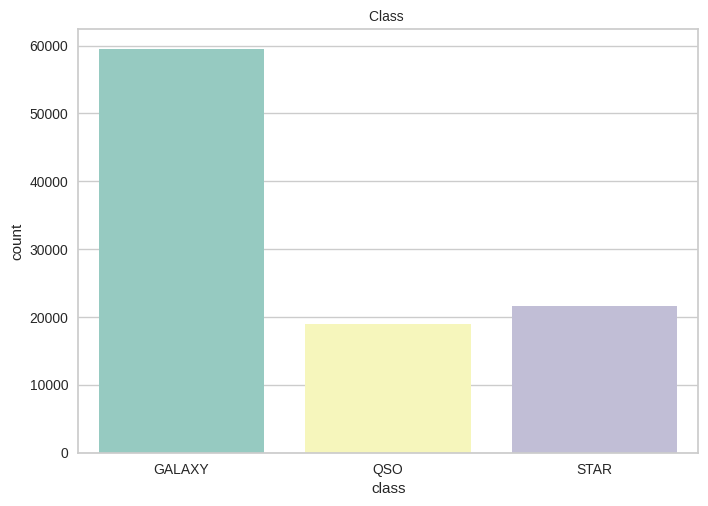

In [11]:
sns.countplot(x = df["class"], palette="Set3")
plt.title("Class ",fontsize=10)
plt.show()

РАСПРЕДЕЛЕНИЕ ЗНАЧЕНИЙ

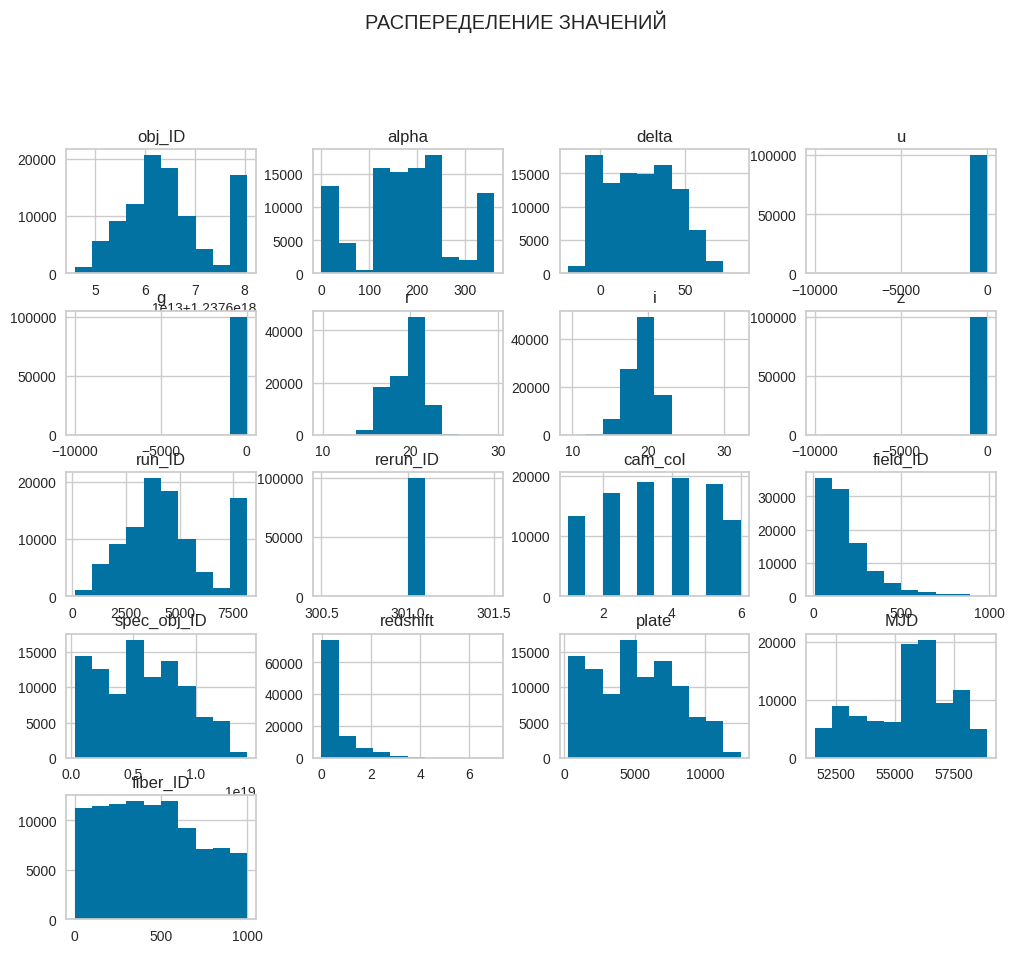

In [12]:
df.drop(['class'], axis=1).hist(figsize=(12, 10))
x=df.drop(['class'], axis=1)
y=df['class']
plt.suptitle('РАСПЕРЕДЕЛЕНИЕ ЗНАЧЕНИЙ', y=1.02)
plt.show()

КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ДАННЫХ И РАЗДЕЛЕНИЕ ДАТАСЕТА

In [13]:
df['class'].value_counts(dropna=False)

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [14]:
df['class'] = df['class'].map({'GALAXY': 0,
                               'STAR': 1,
                               'QSO': 2})

ОБНАРУЖЕНИЕ ВЫБРОСОВ

In [15]:
numeric_list = ["obj_ID", "alpha","delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","redshift","plate","MJD","fiber_ID"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842


In [16]:
# обнаружение выбросов
clf = LocalOutlierFactor() #класс в Python, который используется для
#обнаружения аномалий с помощью локального фактора аномальности (LOF).
#LOF измеряет локальное отклонение плотности данной выборки относительно её соседей.
#Он зависит от того, насколько изолирован объект относительно окружающей окрестности.
#Сравнивая локальную плотность выборки с локальными плотностями её соседей,
#можно определить образцы, которые имеют существенно более низкую плотность,
#чем их соседи. Такие образцы считаются аномальными.
y_pred = clf.fit_predict(df) #обучение и прогноз

In [17]:
x_score = clf.negative_outlier_factor_ #Оценка отклонений обучающей выборки
outlier_score = pd.DataFrame() #создаем пустую таблицу
outlier_score["score"] = x_score

#пороговое значение
threshold = np.quantile(x_score , .10) #вычисляем квантиль массива
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist() #список значений по фильтру

In [18]:
threshold

-2.3169030647147557

In [19]:
len(outlier_index)

10000

In [20]:
df.drop(outlier_index, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       90000 non-null  float64
 1   alpha        90000 non-null  float64
 2   delta        90000 non-null  float64
 3   u            90000 non-null  float64
 4   g            90000 non-null  float64
 5   r            90000 non-null  float64
 6   i            90000 non-null  float64
 7   z            90000 non-null  float64
 8   run_ID       90000 non-null  int64  
 9   rerun_ID     90000 non-null  int64  
 10  cam_col      90000 non-null  int64  
 11  field_ID     90000 non-null  int64  
 12  spec_obj_ID  90000 non-null  float64
 13  class        90000 non-null  int64  
 14  redshift     90000 non-null  float64
 15  plate        90000 non-null  int64  
 16  MJD          90000 non-null  int64  
 17  fiber_ID     90000 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 13.0 MB


ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИИ

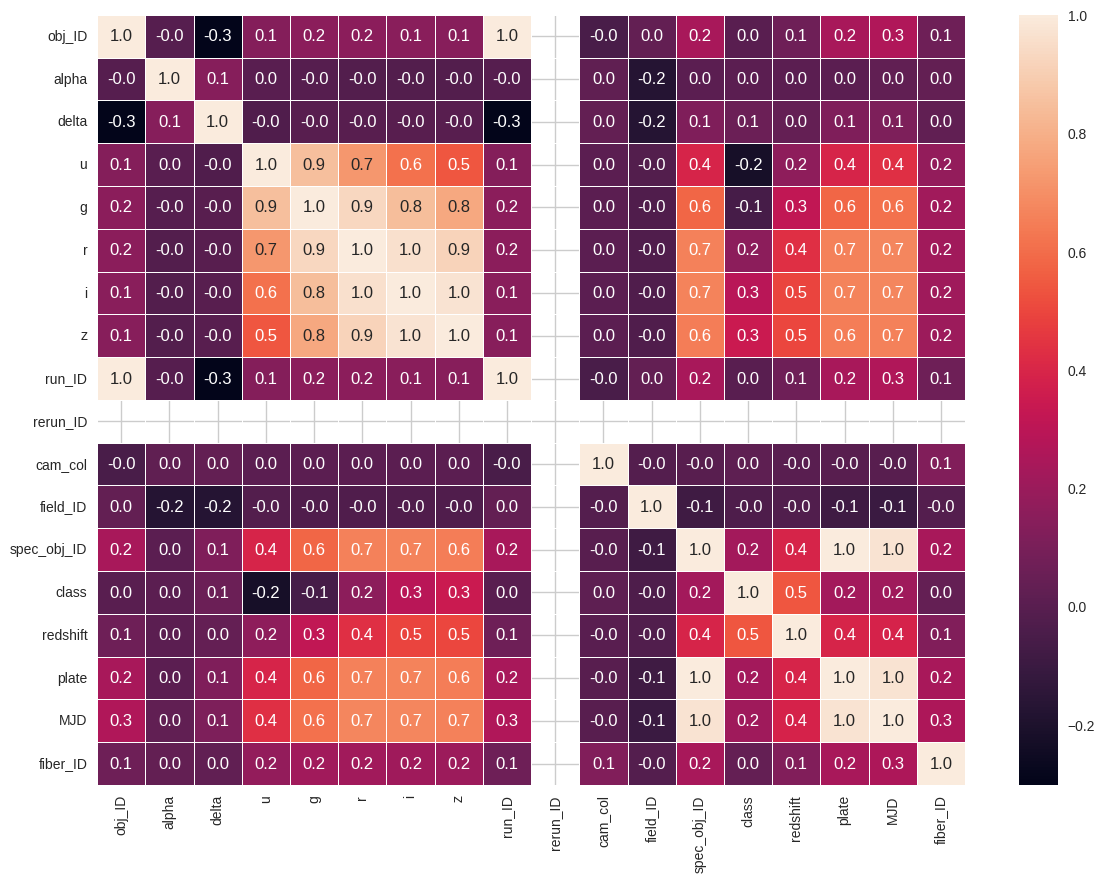

In [22]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [23]:
corr = df.corr() # вычисляет корреляцию между всеми парами столбцов

In [24]:
corr["class"].sort_values()

u             -0.225727
g             -0.061792
field_ID      -0.037150
run_ID         0.000467
obj_ID         0.000469
alpha          0.006893
cam_col        0.016330
fiber_ID       0.035822
delta          0.058363
r              0.157763
MJD            0.212287
spec_obj_ID    0.222534
plate          0.222534
i              0.291805
z              0.347906
redshift       0.541167
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

Следовательно, мы можем отбросить значение NAN.

УДАЛЕНИЕ МЕТАДАННЫХ

In [25]:
df = df.drop(['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID', 'spec_obj_ID', 'MJD', 'plate'], axis = 1)

In [26]:
df.head()

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123


РАБОТА С ДИСБАЛАНСОМ

Использую технику SMOTE, т.к. он эффективно устраняет дисбаланс.

Метод синтетического генерирования данных. Позволяет увеличить количество примеров малых классов, избегая при этом чрезмерного обучения. В результате создаются новые синтезированные образцы, близкие к другим точкам (принадлежащим к малому классу) в пространстве признаков.

В частности, сначала выбирается случайный пример из класса меньшинства. Затем находятся k ближайших соседей для этого примера (обычно k=5). Выбирается случайно выбранный сосед и создается синтетический пример в случайно выбранной точке между двумя примерами в пространстве признаков.

In [27]:
x = df.drop(["class"], axis = 1) #столбец с классами
y = df.loc[:,"class"].values #метки для каждого образца

In [28]:
sm = SMOTE(random_state=42) #создаем экземпляр класса SMOTE
print('Исходная форма набора данных %s' % Counter(y))
x, y = sm.fit_resample(x, y) #применяем алгоритм
print('Форма набора данных с измененной выборкой %s' % Counter(y))

Исходная форма набора данных Counter({0: 53813, 1: 18996, 2: 17191})
Форма набора данных с измененной выборкой Counter({0: 53813, 2: 53813, 1: 53813})


СТАНДАРТИЗАЦИЯ

Стандартизирую функции, удалив среднее значение и масштабируя его до единичной дисперсии.

In [29]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Train Test Split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [31]:
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (108164, 8)
x_test: (53275, 8)
y_train: (108164,)
y_test: (53275,)


**ПРИМЕНЕНИЕ МЕТОДОВ МАШИННОГО ОБУЧЕНИЯ**

ОБУЧЕНИЕ: РЕАЛИЗАЦИЯ АЛГОРИТМОВ KNN, SVM И RF

In [32]:
import statsmodels.api as sm #загрузит большую часть статистических моделей public . Это делает большинство функций и классов удобными доступными
from sklearn.metrics import classification_report #печать метрик классификации для модели
from sklearn.metrics import confusion_matrix #отображения количества точных и неточных случаев на основе прогнозов модели
from sklearn.metrics import roc_curve,precision_score,recall_score,f1_score,accuracy_score
#ROC — это график, отображающий чувствительность и специфичность модели логистической регрессии
#и вычисление точности модели
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC,ConfusionMatrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgboost
#XGBoost — одна из самых популярных и эффективных реализаций алгоритма градиентного бустинга на деревьях.
#В основе XGBoost лежит алгоритм градиентного бустинга деревьев решений.
#Градиентный бустинг — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений.
#from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
#Voting Classifier — это модель машинного обучения, которая тренируется на ансамбле многочисленных моделей и предсказывает выходной класс на основе их наибольшей вероятности выбора этого класса.
#Voting Classifier объединяет результаты каждого классификатора, передаваемого в него, и предсказывает выходной класс на основе наибольшего большинства голосов.
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import BaggingClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import time



МЕТОД ОПОРНЫХ ВЕКТОРОВ Support Vector Machine (SVM)

 основная идея SVM заключается в поиске гиперплоскости или линии, разделяющей классы наилучшим образом, а расположенные ближе всего к разделяющей гиперплоскости образцы называются опорными векторами. Лучшим разделением классов будет то, при котором максимизируется расстояние между опорными векторами и разделяющей гиперплоскостью. Это расстояние называется зазором.

In [33]:
svm_clf = svm.SVC(kernel='linear', C=10, random_state=42)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))
print(predicted)

Accuracy : 0.967
[0 1 2 ... 2 0 0]


In [34]:
svm_clf = svm.SVC(kernel='rbf', C=10, random_state=42)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))
print(predicted)

Accuracy : 0.974
[0 1 2 ... 2 0 0]


In [37]:
classes = ['GALAXY','STAR','QSO']

['GALAXY', 'STAR', 'QSO']


Матрица ошибок представляет собой способ визуализации для оценки качества классификаторов.

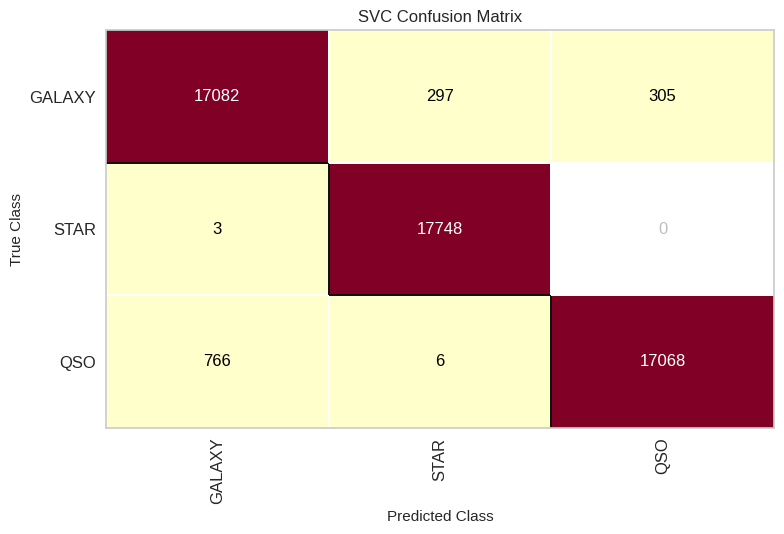

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap='YlOrRd')
svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [39]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17684
           1       0.98      1.00      0.99     17751
           2       0.98      0.96      0.97     17840

    accuracy                           0.97     53275
   macro avg       0.97      0.97      0.97     53275
weighted avg       0.97      0.97      0.97     53275



ROC (receiver operating characteristic) кривая ошибок
Она базируется на балансе долей двух типов объектов — TPR (true positive rate) или «верно классифицированных» как несущие признак и FPR (false positive rate) «ошибочно классифицированных» как несущие признак — при определении точек порогов (thresholds) решающего правила.

Показатель AUC (Area Under the ROC Curve) — это мера, которая позволяет суммировать производительность модели одним числом, измеряя площадь под кривой ROC. AUC колеблется от 0 до 1, где более высокое значение AUC указывает на более высокую производительность модели. AUC равный 0.5 указывает на отсутствие дискриминационной способности модели, тогда как AUC равный 1.0 означает идеальное различие классов.

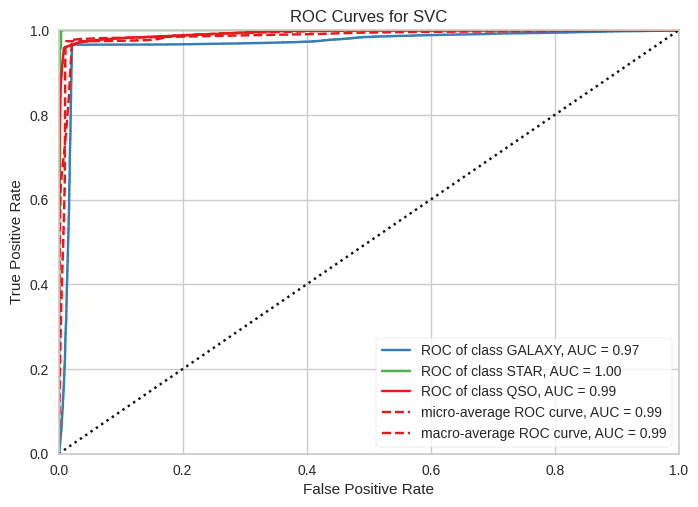

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [40]:
visualizer = ROCAUC(svm_clf, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

СЛУЧАЙНЫЙ ЛЕС (Random Forest Classifier)

Базовая идея дерева решений заключается в формировании запросов, с которыми алгоритм обращается к данным.
Использует ансамбль деревьев решений.
Лес состоит из деревьев. Чем больше деревьев в лесу, тем он крепче. RF создает деревья решений для случайно выбранных семплов данных, получает прогноз от каждого дерева и выбирает наилучшее решение посредством голосования.

In [41]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)
y_predicted = RFC.predict(x_test)
score = RFC.score(x_test, y_test)
rf_score_ = np.mean(score)
print('Accuracy : %.3f' % (rf_score_))
print(y_predicted)

Accuracy : 0.982
[0 1 2 ... 2 0 0]



Confusion Matrix for RFC

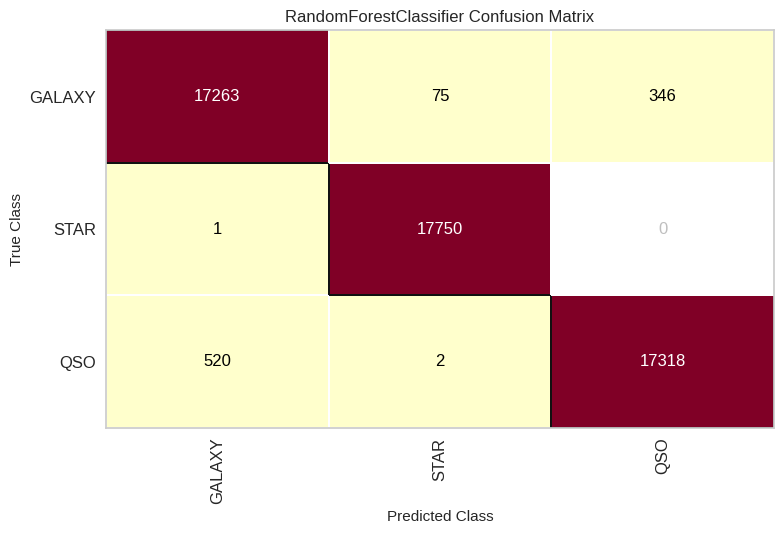

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
RFC_cm = ConfusionMatrix(RFC, classes=classes, cmap='YlOrRd')
RFC_cm.fit(x_train, y_train)
RFC_cm.score(x_test, y_test)
RFC_cm.show()

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17684
           1       1.00      1.00      1.00     17751
           2       0.98      0.97      0.98     17840

    accuracy                           0.98     53275
   macro avg       0.98      0.98      0.98     53275
weighted avg       0.98      0.98      0.98     53275



ROC Curve for RFC

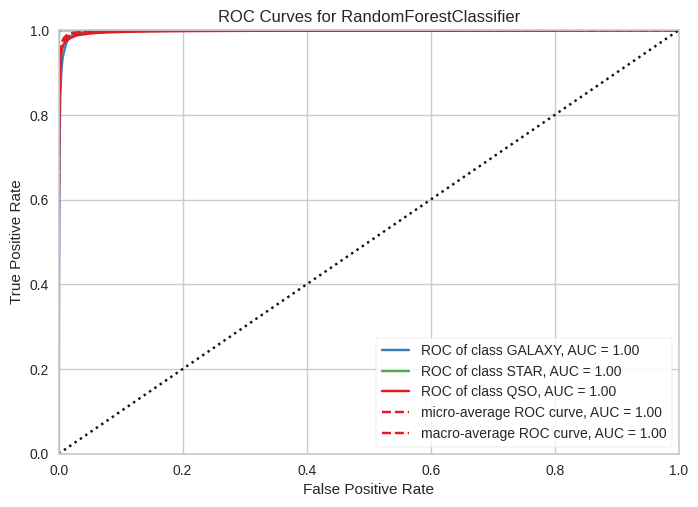

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(RFC, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

МЕТОД K-БЛИЖАЙШИХ СОСЕДЕЙ (KNN (K-Nearest Neighbors))

Метод основан на предположении о том, что близким объектам в признаковом пространстве соответствуют похожие метки.

Для нового объекта x метод предполагает найти ближайшие к нему объекты x1 , x2 , . . xK и построить прогноз по их меткам.

Чаще всего наиболее предпочтительным значением для k является 5:
- Низкое значение k, например, 1 или 2, может привести к эффекту недообучения модели.
- Высокое значение k на первый взгляд выглядит приемлемо, однако возможны трудности с производительностью модели, а также повышается риск переобучения.

In [43]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
y_predicted_KNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))
print(y_predicted_KNN)

Accuracy : 0.953
[0 1 2 ... 2 0 0]


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
y_predicted_KNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy : 0.956


Confusion Matrix for KNN

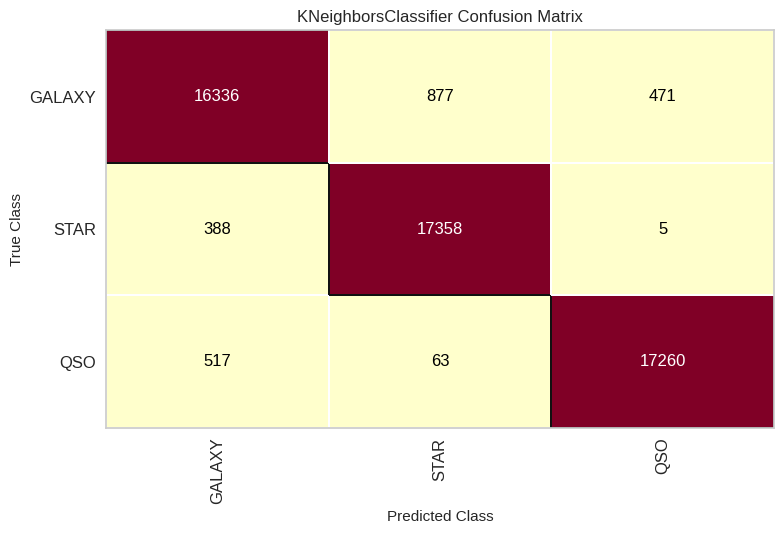

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
KNN_cm = ConfusionMatrix(KNN, classes=classes, cmap='YlOrRd')
KNN_cm.fit(x_train, y_train)
KNN_cm.score(x_test, y_test)
KNN_cm.show()

In [ ]:
print(classification_report(y_test, y_predicted_KNN))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     17684
           1       0.95      0.98      0.96     17751
           2       0.97      0.97      0.97     17840

    accuracy                           0.96     53275
   macro avg       0.96      0.96      0.96     53275
weighted avg       0.96      0.96      0.96     53275




ROC Curve for KNN

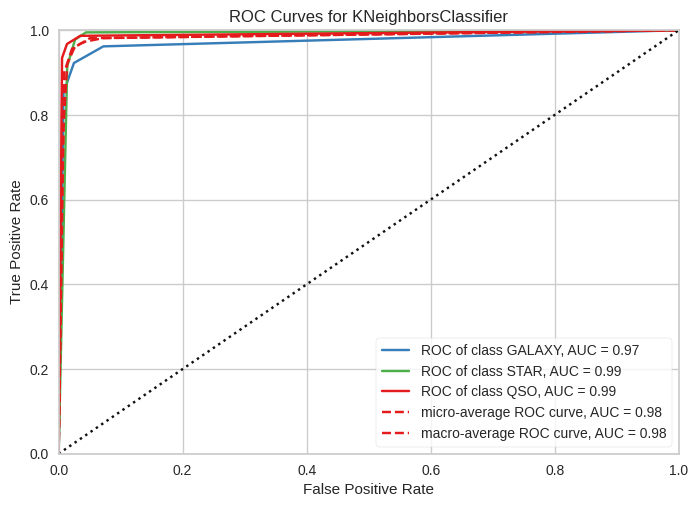

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(KNN, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

**ИТОГИ В РАССМОТРЕНИИ МЕТОДОВ МАШИННОГО ОБУЧЕНИЯ**

Рассмотрены общие характеристики датасета и выполнена очистка данных.
Процесс обработки включает:
- кодирование категориальных данных
- устранение выбросов
- удаление метаданных
- устранение дисбаланса
- стандартизацию значений
- разделение датасета

Исследованы 3 модели для задачи классификации Stellar, использованы наиболее распространенные метрики:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Площадь под кривой ROC (Receiver Operating Characteristic) или просто AUC (AUC)

Все 3 модели дают очень хорошую точность. Однако Случайный лес на шаг впереди других моделей.

**РЕАЛИЗАЦИЯ ГЛУБОКОГО ОБУЧЕНИЯ - создание многослойной нейронной сети**

In [ ]:
import tensorflow as tf

In [ ]:
import keras #библиотека, предназначенная для глубокого машинного обучения
#Позволяет быстрее создавать и настраивать модели — схемы, по которым распространяется и подсчитывается информация при обучении.
#Сложных математических вычислений Keras не выполняет и используется как надстройка над другими библиотеками.

In [ ]:
!pip install keras

In [ ]:
model = tf.keras.Sequential() #Создаем экземпляр класса Sequential, то есть, последовательную архитектуру нейронной сети
model.add(tf.keras.layers.Dense(24, activation='relu', input_shape=(x_train.shape[1],)),) #входной слой, описание формы входных данных
model.add(tf.keras.layers.Dense(64, activation='relu'),)
#model.add(tf.keras.layers.Dense(64, activation='relu'),)
model.add(tf.keras.layers.Dense(3, activation='softmax')) #на выходе 3 нейрона, т.к. 3 класса; функ-я softmax, т.к. она преобразует вектор вещественных чисел в вероятностное распределение.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # loss=' ' функция потерь, которая используется для моделей классификации,
#где количество целевых классов больше двух.
history=model.fit(x_train,y_train, epochs=70, batch_size=32, verbose=0)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0) #оценки уже подготовленной модели с использованием данных проверки (или тестирования) и соответствующих меток.
#Функция возвращает значение потерь и значения метрик для модели.
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.975429356098175


In [ ]:
print(f'Test loss: : {test_loss}')

Test loss: : 0.07880695164203644


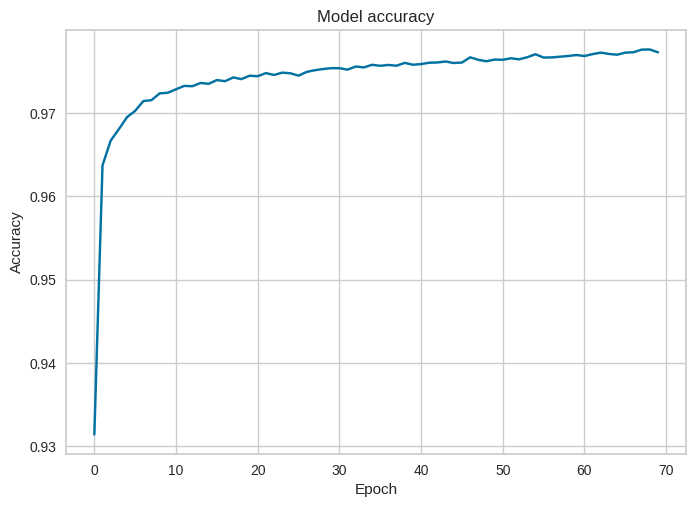

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

**РЕЗУЛЬТАТЫ РАБОТЫ**

---



Таким образом реализовано машинное и глубокое обчучение для классификации звезд, галактик и квазаров на основе спектральных характеристик.

Оба подхода дают весьма точную классификацию.